In [1]:
# Task1: Tweets.csv로 lsi모델 적용하고 seaborn plot 그리기
#columns : airline, text, airline_sentiment
'''
1. LsiModel 적용하기(df.text)
2. topic = 10개 뽑기
3. coherence score 산출
4. 랜덤으로 문서 1개 뽑아서 핑거프린트 출력
=> 함수로 짜면 best
'''

'\n1. LsiModel 적용하기(df.text)\n2. topic = 10개 뽑기\n3. coherence score 산출\n4. 랜덤으로 문서 1개 뽑아서 핑거프린트 출력\n=> 함수로 짜면 best\n'

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

from gensim.parsing.preprocessing import remove_stopwords
#remove_stopwords(<text>)
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LsiModel, CoherenceModel

import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import cm
style.use('fivethirtyeight')

import re
from nltk.tokenize import word_tokenize, casual_tokenize
from nltk.stem import PorterStemmer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
file = '/content/drive/MyDrive/Tweets.csv'
df = pd.read_csv(file)
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,5.695880e+17,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2/22/2015 12:01,NaN,NaN
14636,5.695870e+17,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2/22/2015 11:59,Texas,NaN
14637,5.695870e+17,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2/22/2015 11:59,"Nigeria,lagos",NaN
14638,5.695870e+17,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2/22/2015 11:59,New Jersey,Eastern Time (US & Canada)


In [2]:
def clean(text):
  text = re.sub(r'\b@\w*\b','',text)
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  
  tokens = word_tokenize(text)
  
  porter = PorterStemmer()
  stems = [porter.stem(word) for word in tokens]
  new_text = ' '.join(stems)
  return new_text

def preprocess(text):
  text = clean(text)
  text = remove_stopwords(text)
  text = simple_preprocess(text)
  return text

In [5]:
df['tweet'] = df.text.apply(preprocess)
tweets=df.tweet.to_list()

In [6]:
dictionary = Dictionary(tweets)

In [7]:
num_topics=10
model = LsiModel([dictionary.doc2bow(document) for document in tweets],
                  num_topics = num_topics, 
                  id2word=dictionary)

In [8]:
coherence = CoherenceModel(model=model,
                           texts = tweets,
                           dictionary = dictionary,
                           coherence='c_v')
score=coherence.get_coherence().round(3)
print(score)

0.327


In [9]:
model.print_topics()

[(0,
  '0.734*"flight" + 0.328*"unit" + 0.217*"usairway" + 0.198*"americanair" + 0.176*"cancel" + 0.164*"wa" + 0.141*"southwestair" + 0.112*"jetblu" + 0.107*"hour" + 0.103*"delay"'),
 (1,
  '-0.883*"unit" + 0.326*"flight" + 0.176*"usairway" + 0.140*"americanair" + 0.111*"cancel" + 0.085*"southwestair" + -0.070*"thank" + -0.056*"bag" + -0.055*"thi" + 0.055*"jetblu"'),
 (2,
  '-0.609*"usairway" + 0.472*"flight" + -0.378*"americanair" + -0.168*"thank" + -0.155*"thi" + -0.151*"servic" + -0.143*"custom" + -0.116*"hour" + 0.113*"cancel" + -0.109*"wa"'),
 (3,
  '0.610*"usairway" + -0.549*"americanair" + -0.460*"jetblu" + -0.170*"thank" + -0.155*"southwestair" + 0.122*"flight" + 0.074*"unit" + -0.065*"thi" + -0.065*"wa" + -0.047*"aa"'),
 (4,
  '-0.734*"jetblu" + 0.583*"americanair" + -0.173*"southwestair" + -0.156*"usairway" + -0.117*"thank" + 0.082*"cancel" + -0.070*"thi" + 0.062*"unit" + 0.055*"flight" + 0.052*"aa"'),
 (5,
  '-0.869*"southwestair" + 0.361*"jetblu" + 0.163*"americanair" + -0.

In [10]:
docs=[dictionary.doc2bow(document) for document in tweets]
document_10 = docs[10] #10번 문서
model[document_10] #문서10에 대한 topic 10개

[(0, 0.05583522082655295),
 (1, -0.008424777236098076),
 (2, -0.03346924879839237),
 (3, -0.029628897859757846),
 (4, -0.02283498918443394),
 (5, -0.023608716588999268),
 (6, 0.010429989774045486),
 (7, 0.010650822022627848),
 (8, -0.002127250570394413),
 (9, -0.03733148065322261)]

In [11]:
df = pd.DataFrame(model[document_10], columns = ['Topic', 'Relevance']).set_index('Topic')
df

,Relevance
Topic,
0,0.055835
1,-0.008425
2,-0.033469
3,-0.029629
4,-0.022835
5,-0.023609
6,0.010430
7,0.010651
8,-0.002127


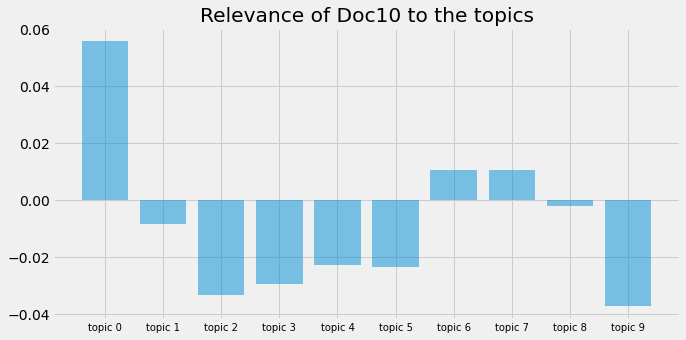

In [12]:
#plot

plt.figure(figsize=(10,5))
ax = plt.bar(
    range(len(df)),
    df.Relevance,
    linewidth = 1,
    alpha=.5
)
plt.xticks(np.arange(len(df)), #tick range 설정
           [f'topic {i}' for i in range(len(df))], #tick에 들어갈 x축 이용
           fontsize=10,
           #rotation=45
           )

plt.title('Relevance of Doc10 to the topics')
plt.show()

In [13]:
############################ Harry Potter #########################################

In [3]:
import os
path = '/content/drive/MyDrive/harrypotter/'
hp=sorted(os.listdir(path))
hp

['HPBook1.txt',
 'HPBook2.txt',
 'HPBook3.txt',
 'HPBook4.txt',
 'HPBook5.txt',
 'HPBook6.txt',
 'HPBook7.txt']

In [15]:
common_word = dict()
for file in sorted(os.listdir(path)):
  with open(path+file) as f:
    data = [line.strip() for line in f.readlines() if not line.isspace()]
  sents = [preprocess(sent) for sent in data]
  bow = []
  for sent in sents:
    for word in sent:
      bow.append(word)
  fdbow = nltk.FreqDist(bow)
  most = fdbow.most_common(10)
  common_word[most[0]]=most[1]

In [16]:
common_word #모든 문서에서 harri 라는 단어가 제일 많다.

{('harri', 1672): ('wa', 1186),
 ('harri', 2035): ('wa', 1266),
 ('harri', 2535): ('wa', 1682),
 ('harri', 3514): ('said', 2441),
 ('harri', 3980): ('wa', 2740),
 ('harri', 3998): ('wa', 2782),
 ('harri', 5186): ('said', 3945)}

In [17]:
freqs = [freq for word, freq in common_word.keys()]
harrys=[]
for i in range(1,len(sorted(os.listdir(path)))+1):
  harrys.append(f'harrypotter{i}')
harrys

['harrypotter1',
 'harrypotter2',
 'harrypotter3',
 'harrypotter4',
 'harrypotter5',
 'harrypotter6',
 'harrypotter7']

In [18]:
df = pd.DataFrame(freqs, columns=['frequency'])
df.index = harrys
df

,frequency
harrypotter1,1672
harrypotter2,2035
harrypotter3,2535
harrypotter4,3980
harrypotter5,5186
harrypotter6,3514
harrypotter7,3998


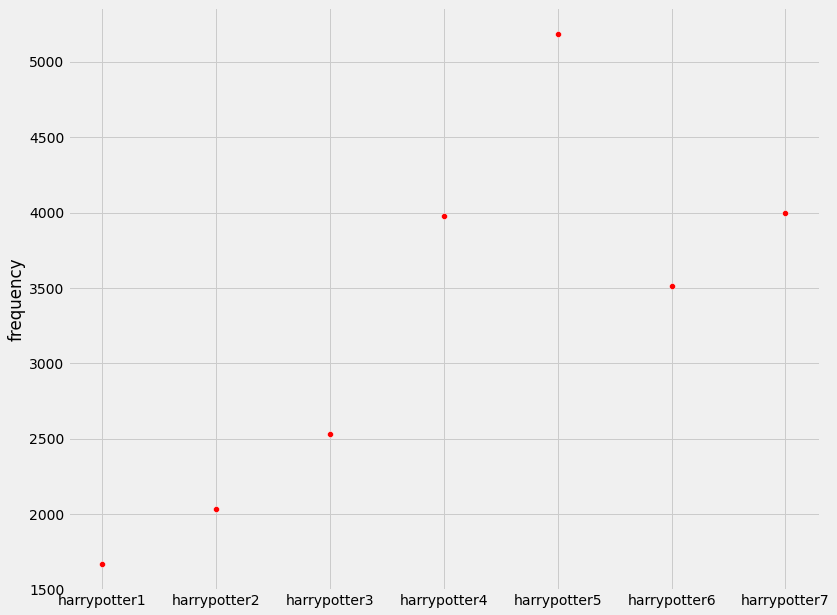

In [19]:
#모든 해리포터 시리즈에서 'harri'가 제일 높은 빈도의 단어임. 각 시리즈에서 'harri'의 빈도가 얼마나 되는지를 scatterplot으로 제시함.
import seaborn as sns
plt.figure(figsize=(12,10))
sns.scatterplot(x=df.index, y=df.frequency, color='red')
plt.show()

In [20]:
#word representation - word2vec 모델로 표현
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False #폰트 깨지는 이슈를 방지함

In [21]:
ls = []
for file in sorted(os.listdir(path)):
  with open(path+file) as f:
    data = [line.strip() for line in f.readlines() if not line.isspace()]
  sents = [preprocess(sent) for sent in data]
  bow = []
  for sent in sents:
    for word in sent:
      bow.append(word)
  ls.append(bow)
ls

[['boy',
  'live',
  'mr',
  'mr',
  'dursley',
  'number',
  'privet',
  'drive',
  'proud',
  'perfectli',
  'normal',
  'thank',
  'veri',
  'peopl',
  'youd',
  'expect',
  'involv',
  'anyth',
  'strang',
  'mysteri',
  'becaus',
  'didnt',
  'hold',
  'nonsens',
  'mr',
  'dursley',
  'wa',
  'director',
  'firm',
  'grun',
  'drill',
  'he',
  'wa',
  'big',
  'beefi',
  'man',
  'hardli',
  'ani',
  'neck',
  'veri',
  'larg',
  'mustach',
  'mr',
  'dursley',
  'wa',
  'blond',
  'nearli',
  'twice',
  'usual',
  'neck',
  'came',
  'veri',
  'use',
  'spent',
  'time',
  'crane',
  'garden',
  'fenc',
  'spi',
  'neighbor',
  'dursley',
  'small',
  'son',
  'dudley',
  'opinion',
  'wa',
  'finer',
  'boy',
  'anywher',
  'dursley',
  'everyth',
  'want',
  'secret',
  'greatest',
  'fear',
  'wa',
  'somebodi',
  'discov',
  'didnt',
  'think',
  'bear',
  'anyon',
  'potter',
  'mr',
  'potter',
  'wa',
  'mr',
  'dursley',
  'sister',
  'hadnt',
  'page',
  'harri',
  'po

In [22]:
model2 = Word2Vec(ls,
                 size=100, #vector_size <- 상위버전일때 적으면 됨.
                 window=5,
                 min_count=2,
                 workers=10,
                 sg=1
                 ) #0=cbow, 1=skipgram

In [23]:
vocab = list(model2.wv.vocab)
#model.wv.key_to_index -> 하위버전인 경우, model.wv.vocab대신 이거 써라
vector = model2.wv[vocab]
len(vocab)

9726

In [24]:
#vocab size 축소
vocab_size = 600
vector_show = vector[:vocab_size, :]
vocab_show = vocab[:vocab_size]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


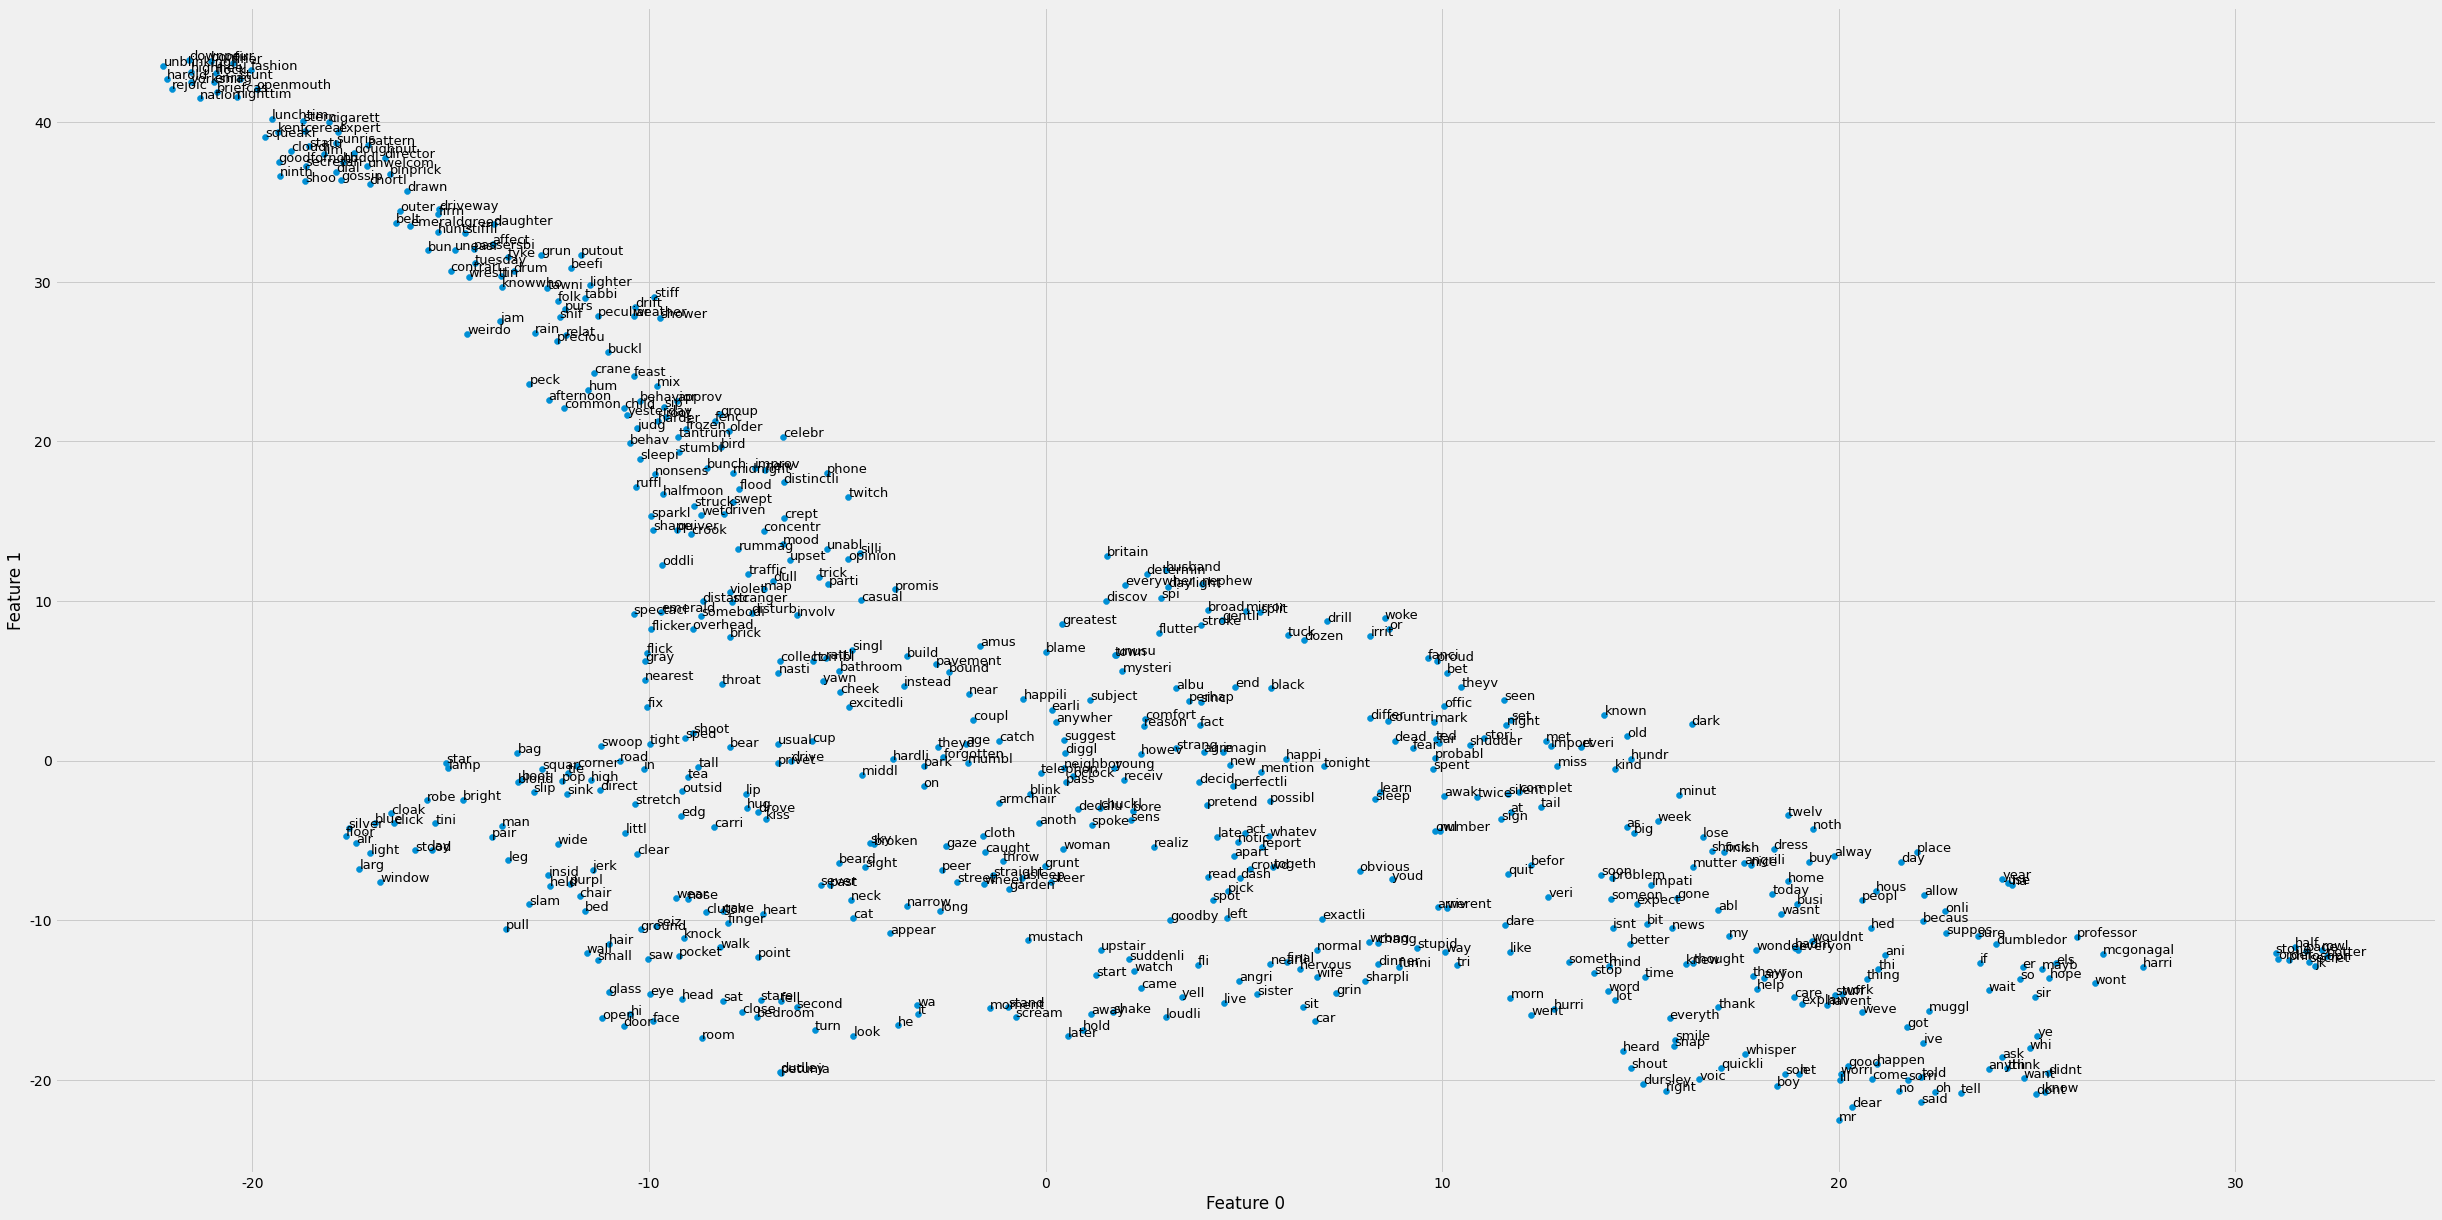

In [25]:
def draw_tsne(model: Word2Vec, vocab_size):
  # 함수
  tsne = TSNE(n_components=2)
  X = tsne.fit_transform(vector_show)

  df = pd.DataFrame(X, index=vocab_show, columns=['x', 'y'])
  fig = plt.figure()
  fig.set_size_inches(38,20)
  ax = fig.add_subplot(1, 1, 1)
  ax.scatter(df.x, df.y)

  for word, vectors in df.iterrows():
    ax.annotate(word, vectors, fontsize=13)

  plt.xlabel('Feature 0')
  plt.ylabel('Feature 1')
  plt.show()

draw_tsne(model2, vocab_size)  

In [26]:
# svd로 토픽수 2개로 줄여서 scatter plot으로 그리기

In [17]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', tokenizer=casual_tokenize)

In [18]:
with open('/content/drive/MyDrive/harrypotter/HPBook1.txt') as f:
  data = [line.strip() for line in f.readlines() if not line.isspace()]
data=[line.lower() for line in data]


In [9]:
from nltk.stem import LancasterStemmer
lancaster = LancasterStemmer()
[lancaster.stem(line) for line in 'grunnings, which made drills, he was a big, beefy. Ron'.split()]

['grunnings,',
 'which',
 'mad',
 'drills,',
 'he',
 'was',
 'a',
 'big,',
 'beefy.',
 'ron']

In [7]:
def preprocessing(text):
  text = re.sub('[^a-zA-Z\s]','',text)
  text = remove_stopwords(text)
  text = remove_stopwords(text)
  text = [lancaster.stem(line) for line in text.split()]
  text = ' '.join(text)
  return text

In [20]:
preprocessed_text =[preprocessing(line) for line in data]

In [21]:
preprocessed_text=[line for line in preprocessed_text if len(line)>0]

In [22]:
preprocessed_text[:10]

['boy liv',
 'mr mrs dursley numb privet driv',
 'proud perfect norm',
 'thank peopl youd',
 'expect involv strange',
 'mystery didnt hold',
 'nonsens',
 'mr dursley direct firm cal',
 'grun dril big beefy',
 'man hard neck']

In [34]:
dtm = tfidf.fit_transform(preprocessed_text).toarray()
dtm.shape[0]

9960

In [35]:
df_dtm = pd.DataFrame(dtm, columns = tfidf.vocabulary_, index = [f"doc {i}" for i in range(dtm.shape[0])])
df_dtm.head(3)

,boy,liv,mr,mrs,dursley,numb,privet,driv,proud,perfect,norm,thank,peopl,youd,expect,involv,strange,mystery,didnt,hold,nonsens,direct,firm,cal,grun,dril,big,beefy,man,hard,neck,larg,mustach,blond,near,twic,cam,spent,tim,cran,...,goldenbrown,plead,harryl,audy,wellorg,ofyear,steamrol,foodl,risky,indo,chuck,grief,remors,y,leathercov,endofyear,fuss,checkup,deck,serp,ful,fiftytwo,twentysix,lastminut,rad,sunburn,bestplay,seventytwo,nudg,downfal,jot,scraped,abysm,wardrob,wiz,gat,threes,gateway,purplefac,spreading
doc 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
svd = TruncatedSVD(n_components=2, n_iter=3)
tsvd = svd.fit_transform(dtm.T)
tsvd.shape

(3666, 2)

In [37]:
len(tsvd[:,0])

3666

In [38]:
len(tsvd[0,:])

2

In [39]:
tsvd_df = pd.DataFrame(tsvd, index = [f'doc {i}' for i in range(len(tsvd[:,0]))], columns = [f"topic {i}" for i in range(len(tsvd[0,:]))])
tsvd_df.head()

,topic 0,topic 1
doc 0,5.541547e-11,3.095344e-10
doc 1,-1.622551e-11,5.374192e-09
doc 2,9.363255e-10,1.744397e-08
doc 3,2.310705e-05,5.425380e-04
doc 4,7.505425e-05,1.683299e-03


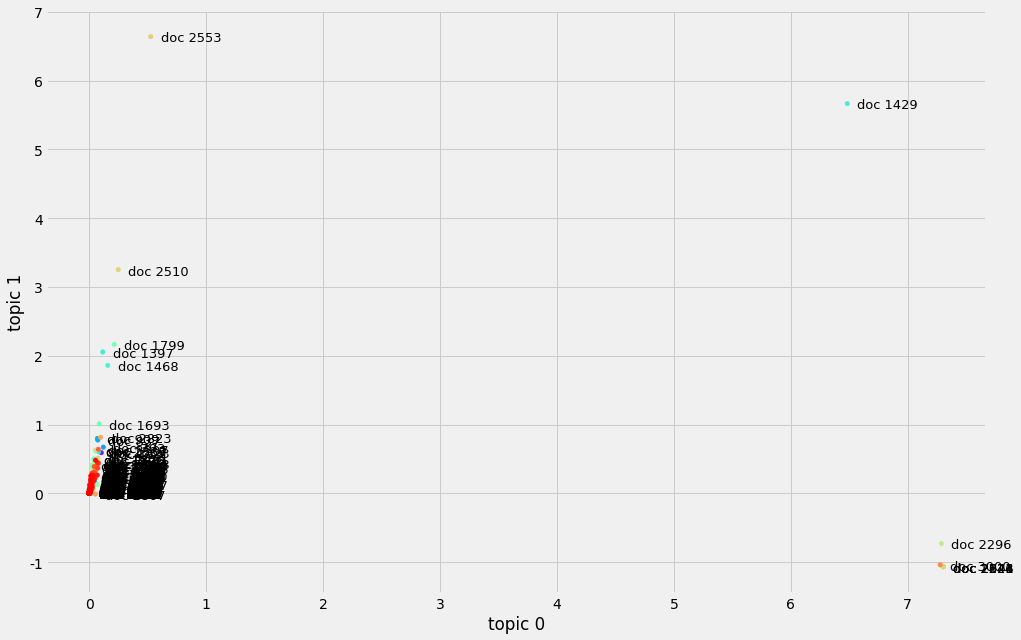

In [40]:
fig, ax = plt.subplots(figsize=(15, 10))
cmap = cm.get_cmap('rainbow')
tsvd_df.plot('topic 0', 'topic 1', kind='scatter', ax=ax, c=range(len(tsvd_df)), colormap=cmap)

for k, v in tsvd_df.iterrows(): #k=index, v=values
  plt.annotate(k, v,
               xytext = (10, -5),
               textcoords = 'offset points',
               fontsize = 13,
               family='sans-serif')
  
plt.show()

In [23]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words='english')
dtm = tfidf.fit_transform(preprocessed_text).toarray()
dtm.shape

(9960, 3666)

In [24]:
import pandas as pd
df_dtm = pd.DataFrame(dtm, columns = tfidf.vocabulary_,
                      index=[f'doc {i}' for i in range(dtm.shape[0])])
df_dtm.head(3)

,boy,liv,mr,mrs,dursley,numb,privet,driv,proud,perfect,norm,thank,peopl,youd,expect,involv,strange,mystery,didnt,hold,nonsens,direct,firm,cal,grun,dril,big,beefy,man,hard,neck,larg,mustach,blond,near,twic,cam,spent,tim,cran,...,goldenbrown,plead,harryl,audy,wellorg,ofyear,steamrol,foodl,risky,indo,chuck,grief,remors,y,leathercov,endofyear,fuss,checkup,deck,serp,ful,fiftytwo,twentysix,lastminut,rad,sunburn,bestplay,seventytwo,nudg,downfal,jot,scraped,abysm,wardrob,wiz,gat,threes,gateway,purplefac,spreading
doc 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
doc 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
U, S, Vt = np.linalg.svd(dtm.T)
U.shape

(3666, 3666)

In [27]:
df_svd = pd.DataFrame(U[:, :2], 
                      columns = [f'topic {i}' for i in range(U[:, :2].shape[1])], 
                      index=tfidf.vocabulary_)
df_svd.head(10)

,topic 0,topic 1
boy,0.000000e+00,0.000000e+00
liv,0.000000e+00,0.000000e+00
mr,0.000000e+00,0.000000e+00
mrs,1.311263e-06,-4.884097e-05
dursley,4.116374e-06,-1.575181e-04
numb,1.502732e-05,-8.428314e-04
privet,1.160431e-05,-7.264636e-04
driv,2.233250e-04,-4.535358e-03
proud,5.774135e-06,-1.968666e-04
perfect,-5.421011e-20,3.469447e-18


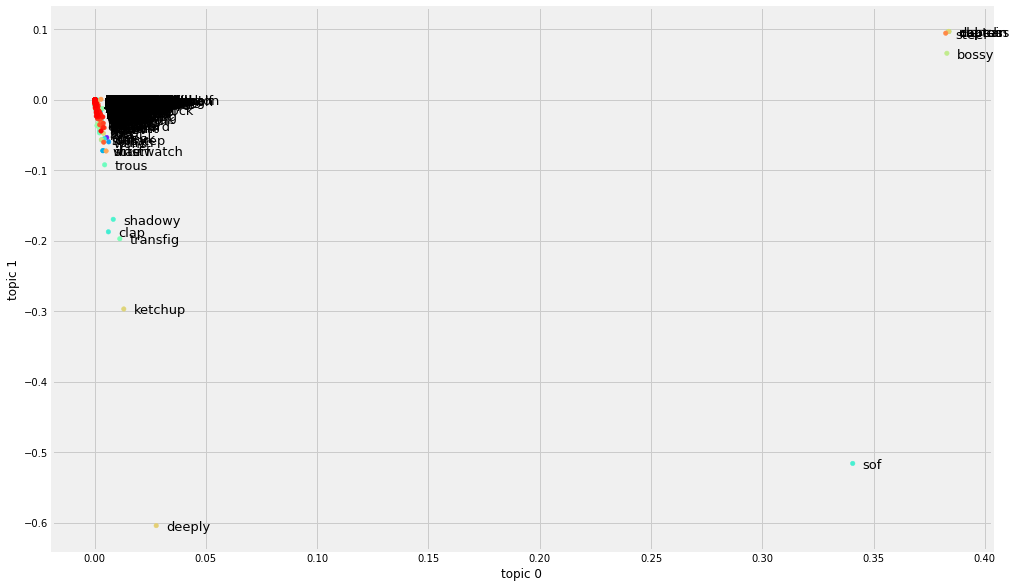

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))
cmap = cm.get_cmap('rainbow')
df_svd.plot('topic 0', 'topic 1', kind='scatter', ax=ax, c=range(len(df_svd)), colormap=cmap)

for k, v in df_svd.iterrows(): #k=index, v=values
  plt.annotate(k, v,
               xytext = (10, -5),
               textcoords = 'offset points',
               fontsize = 13,
               family='sans-serif')
  
plt.show()

In [15]:
#원하는 인물 5명 골라서 벡터를 bar plot으로 그리기

In [29]:
df_svd.loc['dursley',:]

topic 0    0.000004
topic 1   -0.000158
Name: dursley, dtype: float64

In [30]:
df_svd.loc['harry',:]

topic 0    0.000114
topic 1   -0.001902
Name: harry, dtype: float64

In [31]:
df_svd.loc['ron',:]

topic 0    0.000049
topic 1   -0.003217
Name: ron, dtype: float64

In [36]:
df_svd.loc['ginny',:]

topic 0    0.000002
topic 1   -0.000049
Name: ginny, dtype: float64

In [39]:
df_svd.loc['malfoy',:]

topic 0    0.000178
topic 1   -0.001879
Name: malfoy, dtype: float64

In [42]:
df_people=df_svd.loc[['dursley','harry','ron','malfoy','ginny'],:]

In [46]:
topic_0=df_people.iloc[:,0].to_list()

In [47]:
topic_1=df_people.iloc[:,1].to_list()

In [48]:
names = df_people.index.to_list()

In [50]:
import seaborn as sns

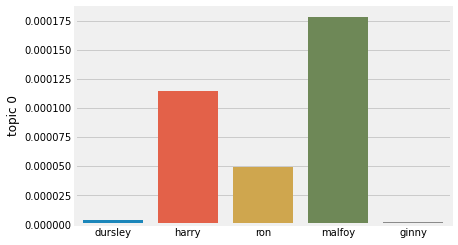

In [56]:
sns.barplot(data=df_people, x=df_people.index, y='topic 0')




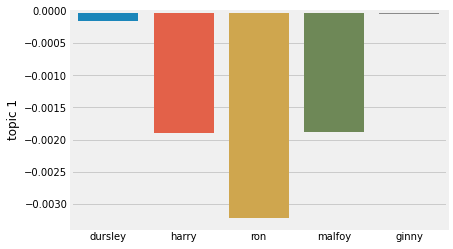

In [57]:
sns.barplot(data=df_people, x=df_people.index, y='topic 1')